In [1]:
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from scipy.stats import linregress
import time

In [2]:
# create the base url
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

### Generate Random Cities

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# create a list for holding cities
cities = []

# identify the nearest city for each latitude and longitude combination
for c in coordinates: 
    lat, lng = c[0], c[1]
    city = citipy.nearest_city(lat, lng).city_name
    
    if city not in cities:
        # if the name is unique, then add to the cities list
        cities.append(city)

# print the city count to confirm sufficient count
print(f'Number of cities: {len(cities)}')

Number of cities: 618


### Initialize an Empty List and Counters
### Loop through the List of Cities and Build the City URL

In [6]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the loutput_data_fileprint('Beginning data retrieval    ')
print('----------------------------')

# create counters
record_count = 1
set_count = 1

# loop through all cities in our list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if i%50 == 0 and i >= 50:
        print('pausing...')
        print('----------------------------\n')
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # create endpoint url with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # log the url, record and set numbers and the city
    print(f'Processing record {record_count} of set {set_count} | {city}.')
    record_count += 1

    try: 
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # append the information to the city_data list
        city_data.append(
            {
                'City': city.title(),
                'Lat': city_lat,
                'Lng': city_lng,
                'Max Temp': city_max_temp,
                'Humidity': city_humidity,
                'Cloudiness': city_clouds,
                'Wind Speed': city_wind,
                'Country': city_country,
                'Date': city_date
            }
        )
    except:
        print('City not found. Skipping...')
        pass

# indicate that data loading is complete
print('----------------------------')
print('Data retrieval complete     ')
print('----------------------------')

----------------------------
Processing record 1 of set 1 | asyut.
Processing record 2 of set 1 | georgetown.
Processing record 3 of set 1 | vestmannaeyjar.
Processing record 4 of set 1 | mataura.
Processing record 5 of set 1 | bredasdorp.
Processing record 6 of set 1 | hobart.
Processing record 7 of set 1 | bluff.
Processing record 8 of set 1 | gat.
Processing record 9 of set 1 | coihaique.
Processing record 10 of set 1 | dikson.
Processing record 11 of set 1 | illoqqortoormiut.
City not found. Skipping...
Processing record 12 of set 1 | ixtapa.
Processing record 13 of set 1 | lisakovsk.
Processing record 14 of set 1 | lady frere.
Processing record 15 of set 1 | grand river south east.
City not found. Skipping...
Processing record 16 of set 1 | jamestown.
Processing record 17 of set 1 | skalistyy.
City not found. Skipping...
Processing record 18 of set 1 | talaya.
Processing record 19 of set 1 | sechura.
Processing record 20 of set 1 | chuy.
Processing record 21 of set 1 | saskylakh.


City not found. Skipping...
Processing record 29 of set 4 | danes.
Processing record 30 of set 4 | korhogo.
Processing record 31 of set 4 | general pico.
Processing record 32 of set 4 | saint george.
Processing record 33 of set 4 | chumikan.
Processing record 34 of set 4 | gushikawa.
Processing record 35 of set 4 | khilok.
Processing record 36 of set 4 | bariadi.
Processing record 37 of set 4 | los llanos de aridane.
Processing record 38 of set 4 | shitanjing.
Processing record 39 of set 4 | lorengau.
Processing record 40 of set 4 | charqueada.
Processing record 41 of set 4 | hermanus.
Processing record 42 of set 4 | pa daet.
Processing record 43 of set 4 | mana.
Processing record 44 of set 4 | mys shmidta.
City not found. Skipping...
Processing record 45 of set 4 | qitaihe.
Processing record 46 of set 4 | ghanzi.
Processing record 47 of set 4 | esperance.
Processing record 48 of set 4 | codrington.
Processing record 49 of set 4 | meulaboh.
Processing record 50 of set 4 | rio gallegos.

Processing record 9 of set 8 | muscat.
Processing record 10 of set 8 | pangnirtung.
Processing record 11 of set 8 | mumbwa.
Processing record 12 of set 8 | katangi.
Processing record 13 of set 8 | benguela.
Processing record 14 of set 8 | umirim.
Processing record 15 of set 8 | kysyl-syr.
Processing record 16 of set 8 | ksenyevka.
City not found. Skipping...
Processing record 17 of set 8 | sorvag.
City not found. Skipping...
Processing record 18 of set 8 | ritchie.
Processing record 19 of set 8 | nelson bay.
Processing record 20 of set 8 | margate.
Processing record 21 of set 8 | chinhoyi.
Processing record 22 of set 8 | korla.
Processing record 23 of set 8 | ancud.
Processing record 24 of set 8 | deep river.
Processing record 25 of set 8 | bontang.
Processing record 26 of set 8 | ngukurr.
City not found. Skipping...
Processing record 27 of set 8 | ambovombe.
Processing record 28 of set 8 | russell.
Processing record 29 of set 8 | ahipara.
Processing record 30 of set 8 | mahanoro.
Proc

Processing record 41 of set 11 | zyryanovsk.
Processing record 42 of set 11 | senneterre.
Processing record 43 of set 11 | pangoa.
Processing record 44 of set 11 | hamilton.
Processing record 45 of set 11 | payo.
Processing record 46 of set 11 | bolungarvik.
City not found. Skipping...
Processing record 47 of set 11 | mehamn.
Processing record 48 of set 11 | praya.
Processing record 49 of set 11 | paamiut.
Processing record 50 of set 11 | seymour.
pausing...
----------------------------

Processing record 1 of set 12 | ellsworth.
Processing record 2 of set 12 | saku.
Processing record 3 of set 12 | gaillac.
Processing record 4 of set 12 | yei.
Processing record 5 of set 12 | syracuse.
Processing record 6 of set 12 | asamankese.
Processing record 7 of set 12 | caravelas.
Processing record 8 of set 12 | pierre.
Processing record 9 of set 12 | coyah.
Processing record 10 of set 12 | bethel.
Processing record 11 of set 12 | saint combs.
City not found. Skipping...
Processing record 12 of s

### Save the `city_data` List as a Pandas DataFrame; Create an output csv file

In [7]:
# convert the list of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [8]:
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Asyut,EG,2022-05-08 01:19:44,27.1810,31.1837,73.09,19,78,6.46
1,Georgetown,MY,2022-05-08 01:19:44,5.4112,100.3354,85.95,74,20,10.36
2,Vestmannaeyjar,IS,2022-05-08 01:19:45,63.4427,-20.2734,45.79,90,100,24.23
3,Mataura,NZ,2022-05-08 01:19:45,-46.1927,168.8643,58.48,98,100,2.24
4,Bredasdorp,ZA,2022-05-08 01:19:46,-34.5322,20.0403,54.77,90,26,1.01
5,Hobart,AU,2022-05-08 01:19:47,-42.8794,147.3294,58.86,63,75,11.50
6,Bluff,NZ,2022-05-08 01:19:47,-46.6000,168.3333,58.80,94,100,6.35
7,Gat,IL,2022-05-08 01:19:48,31.6100,34.7642,60.40,67,31,2.30
8,Coihaique,CL,2022-05-08 01:17:32,-45.5752,-72.0662,60.75,72,86,5.75
9,Dikson,RU,2022-05-08 01:19:49,73.5069,80.5464,7.52,97,86,11.39


In [9]:
# create the output csv file
output_data_file = 'weather_data/cities.csv'
city_data_df.to_csv(output_data_file, index_label='City_ID')

### Plot the Data

In [10]:
# extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# get today's date
today = time.strftime('%x')

In [11]:
#### Plot Latitude vs Max Temperature

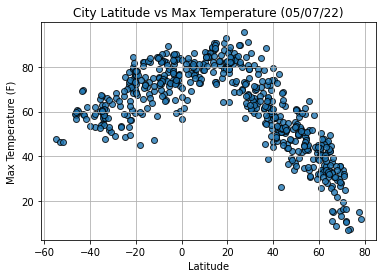

In [12]:
# build the scatter plot 
plt.scatter(
    lats, 
    max_temps,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig1.png')

# show the plot 
plt.show()

#### Plot Latitude vs Humidity

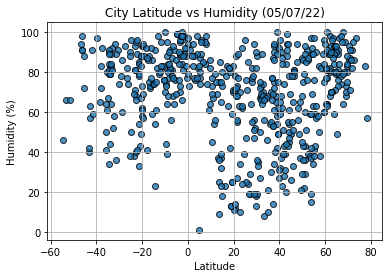

In [13]:
# build the scatter plot for 
plt.scatter(
    lats, 
    humidity,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Humidity ({today})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig2.png')

# show the plot 
plt.show()

#### Plot Latitude vs Cloudiness

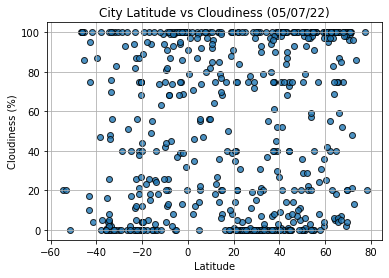

In [14]:
# build the scatter plot 
plt.scatter(
    lats, 
    cloudiness,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig3.png')

# show the plot 
plt.show()

#### Plot Latitude vs Wind Speed

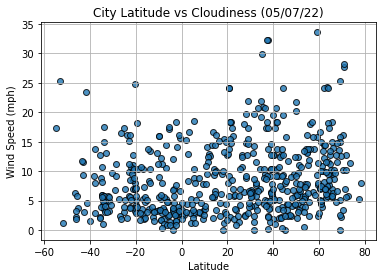

In [15]:
# build the scatter plot 
plt.scatter(
    lats, 
    wind_speed,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig4.png')

# show the plot 
plt.show()

### Find the Correlation Between Latitude and Maxmimum Temperature

#### Create a Linear Regression Function

In [16]:
# create a function to perform linear regress on the weather data and plot a regression line as well as the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates=None, figure_size=(12,8)):
    # perform linear regression 
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    # caluclate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    # get the equation of the line
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
      
    # adjust the figure's size
    plt.figure(figsize=figure_size)

    # create a scatter plot of the x- and y-values
    plt.scatter(x_values, y_values)
    # plot the regression line with the x-values and the y-coordinates based on the intercept and slope
    plt.plot(x_values, regress_values, 'r')
    
    # adjust the text_coordinates based on the input data; mostly this will be 'out of the way', but could use improvement
    if text_coordinates is None: 
        x_bottom, x_top = plt.xlim()
        y_bottom, y_top = plt.ylim()
        text_coordinates = (
            max(x_top * 0.25, 0) if min(x_values) >= 0 else x_bottom * 0.25,
            max(y_top * 0.25, y_bottom * 1.25)
        )
    
    # annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

#### Create Hemisphere DataFrames

In [17]:
northern_hemisphere_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemisphere_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

#### Perform Linear Regression on Max Temperature for Northern Hemisphere

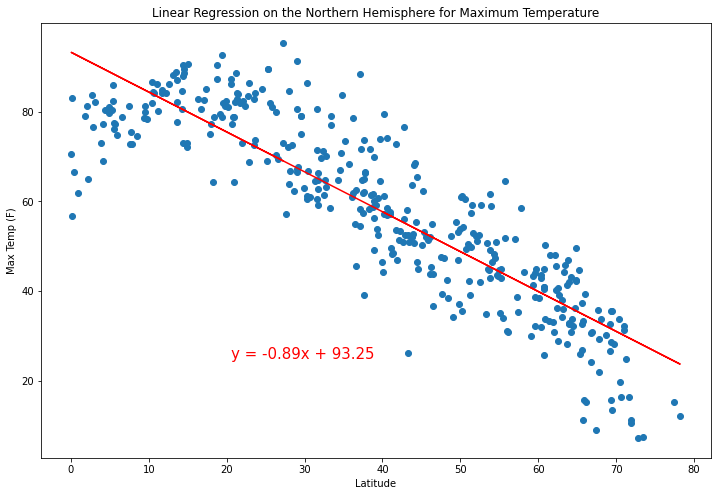

In [18]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Northern Hemisphere ' \
    'for Maximum Temperature',
    y_label='Max Temp (F)'
)

#### Perform Linear Regression on Max Temperature for Southern Hemisphere

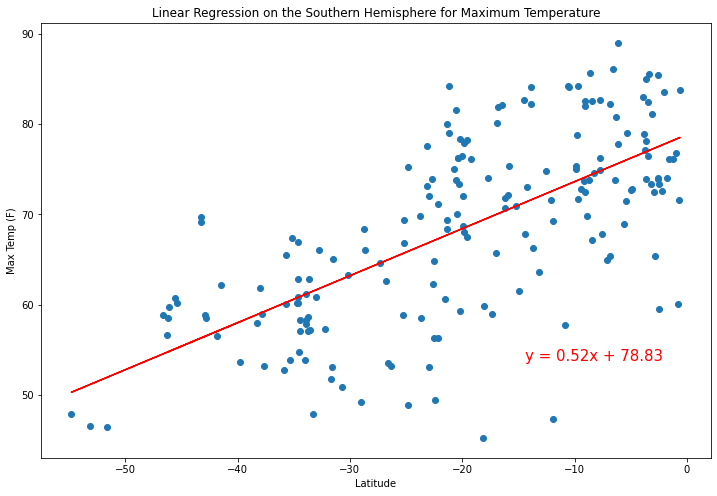

In [19]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Southern Hemisphere ' \
    'for Maximum Temperature',
    y_label='Max Temp (F)'
)

#### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

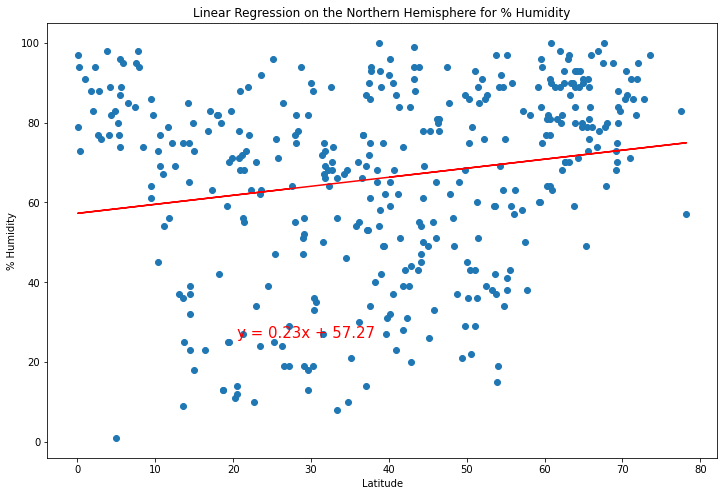

In [20]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Northern Hemisphere ' \
    'for % Humidity',
    y_label='% Humidity'
)

#### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

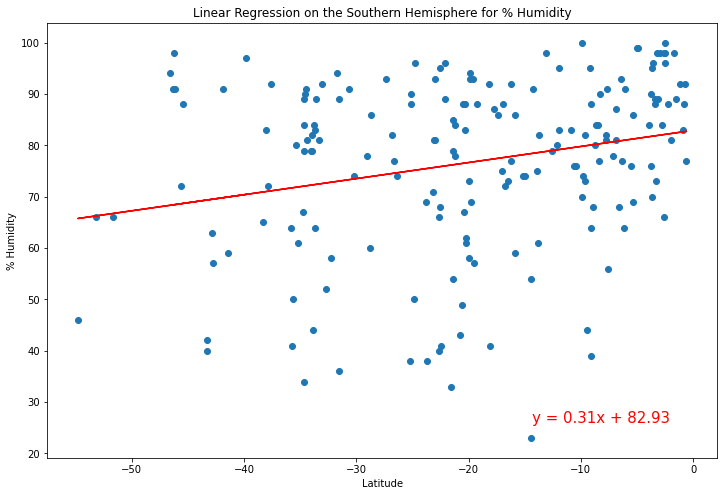

In [21]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Southern Hemisphere ' \
    'for % Humidity',
    y_label='% Humidity'
)

#### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

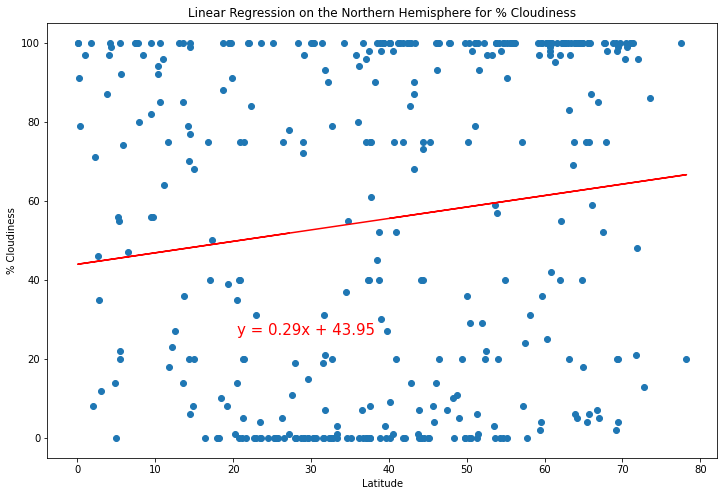

In [22]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Northern Hemisphere ' \
    'for % Cloudiness',
    y_label='% Cloudiness'
)

#### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

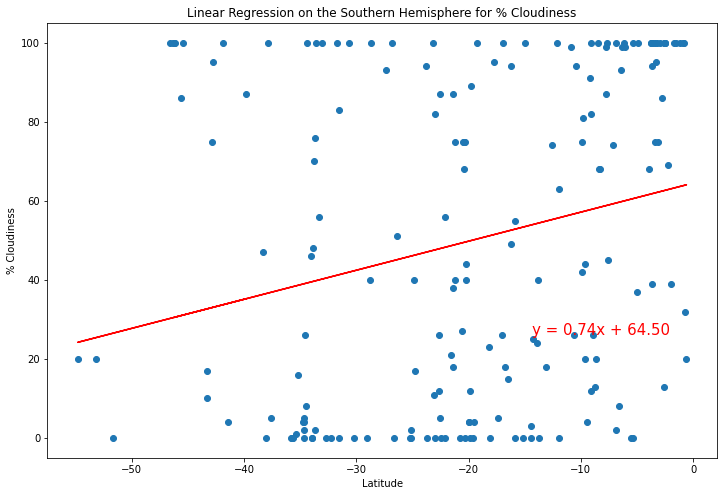

In [23]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Southern Hemisphere ' \
    'for % Cloudiness',
    y_label='% Cloudiness'
)

#### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

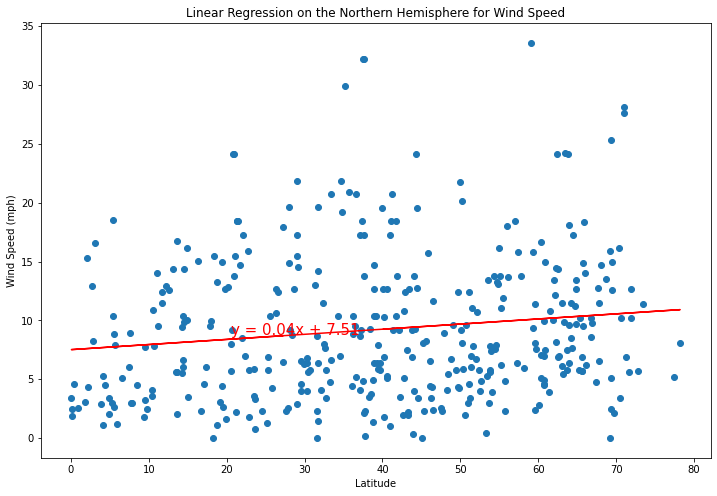

In [24]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Northern Hemisphere ' \
    'for Wind Speed',
    y_label='Wind Speed (mph)'
)

#### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

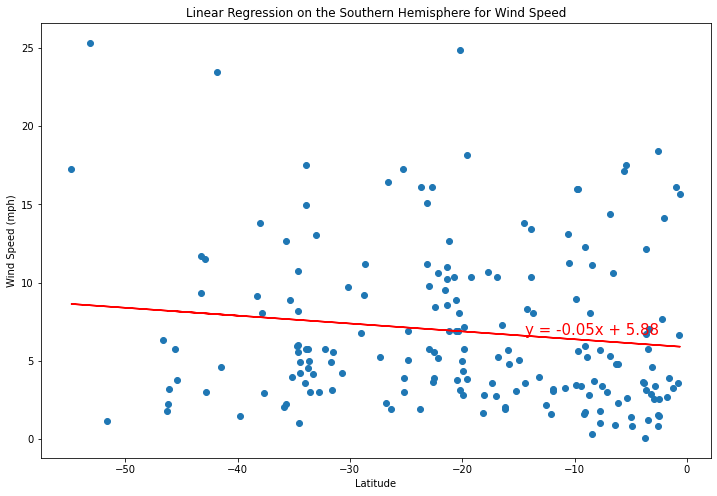

In [25]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Southern Hemisphere ' \
    'for Wind Speed',
    y_label='Wind Speed (mph)'
)